# TRABAJO FINAL DE GRADO - PEC 3
###### Autor: Claudia Reina Fajardo
###### Noviembre 2021

## Modelo de Deep Learning

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as kr

In [2]:
# cargamos el dataset
df = pd.read_csv('data.csv')

In [3]:
# algoritmo red neuronal
def rn (nn, variable, e):
    # eliminamos la clase del conjunto de datos y los elementos sin clasificar y la guardamos para comprobar precisión
    data=df[df[variable]<2]
    Y=data[variable]
    X=data.drop([variable], axis=1).values
    
    # Definimos el ratio de aprendizaje, la distribución de las neuronas y la cantidad de entrenamientos
    lr = 0.001
    nn = nn
    e = e

    # Creamos el objeto que contendrá a nuestra red neuronal, como secuencia de capas.
    model = kr.Sequential()

    # Añadimos la capa 1
    l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

    # Añadimos la capa 2
    l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

    # Añadimos la capa 3, que corresponde a la salida de la red
    l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

    # Compilamos el modelo, definiendo la función de coste y el optimizador.
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr), metrics=['acc'])

    # Y entrenamos al modelo, añadiendo cortes de entrenamiento y la cantidad de entrenamientos que se hará. 
    training=model.fit(X, Y, validation_split = 0.33, epochs=e)

    # Recogemos accuracy total
    results=model.evaluate(X, Y)
    
    return model, training, results

### Red neuronal sobre depresión

#### Estructura 16-8-1

In [4]:
model1, training1, results1 = rn([2, 16, 8, 1], 'depressed', 70)

Epoch 1/70
105/105 [==============================] - 1s 4ms/step - loss: 0.2650 - acc: 0.6890 - val_loss: 0.1905 - val_acc: 0.7514
Epoch 2/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1689 - acc: 0.7690 - val_loss: 0.1511 - val_acc: 0.7944
Epoch 3/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1412 - acc: 0.8094 - val_loss: 0.1317 - val_acc: 0.8290
Epoch 4/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1295 - acc: 0.8252 - val_loss: 0.1288 - val_acc: 0.8260
Epoch 5/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1220 - acc: 0.8333 - val_loss: 0.1192 - val_acc: 0.8411
Epoch 6/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1173 - acc: 0.8402 - val_loss: 0.1149 - val_acc: 0.8502
Epoch 7/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1140 - acc: 0.8476 - val_loss: 0.1125 - val_acc: 0.8551
Epoch 8/70
105/105 [==============================] - 0s 2ms/step - loss: 0.

105/105 [==============================] - 0s 3ms/step - loss: 0.0943 - acc: 0.8766 - val_loss: 0.1112 - val_acc: 0.8569
Epoch 63/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0944 - acc: 0.8775 - val_loss: 0.1117 - val_acc: 0.8526
Epoch 64/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0932 - acc: 0.8799 - val_loss: 0.1146 - val_acc: 0.8472
Epoch 65/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0943 - acc: 0.8763 - val_loss: 0.1116 - val_acc: 0.8611
Epoch 66/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0937 - acc: 0.8775 - val_loss: 0.1101 - val_acc: 0.8581
Epoch 67/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0936 - acc: 0.8742 - val_loss: 0.1122 - val_acc: 0.8532
Epoch 68/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0941 - acc: 0.8793 - val_loss: 0.1167 - val_acc: 0.8484
Epoch 69/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0941

| CALIDAD DEL MODELO |
 - Precisión               : 87.23%
 - Pérdida                 : 9.81%

| PROCESO DE APRENDIZAJE DEL MODELO |


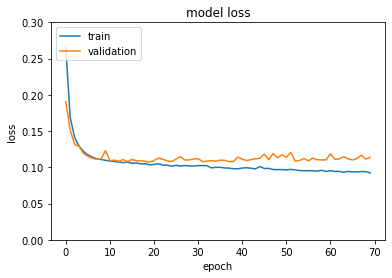

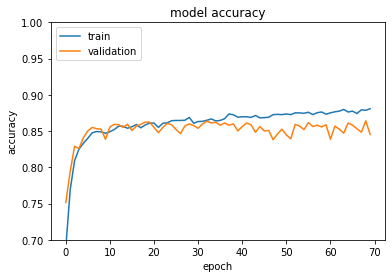

In [5]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results1[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results1[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training1.history["loss"])
plt.plot(training1.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training1.history["acc"])
plt.plot(training1.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



Observamos un poco de overfitting. Haremos el modelo más pequeño.

#### Estructura 10-2-1

In [6]:
model1_1, training1_1, results1_1 = rn([2, 10, 2, 1], 'depressed', 70)

Epoch 1/70
105/105 [==============================] - 1s 5ms/step - loss: 0.2440 - acc: 0.7523 - val_loss: 0.2381 - val_acc: 0.7520
Epoch 2/70
105/105 [==============================] - 0s 3ms/step - loss: 0.2327 - acc: 0.7589 - val_loss: 0.2282 - val_acc: 0.7520
Epoch 3/70
105/105 [==============================] - 0s 3ms/step - loss: 0.2232 - acc: 0.7589 - val_loss: 0.2197 - val_acc: 0.7520
Epoch 4/70
105/105 [==============================] - 0s 3ms/step - loss: 0.2091 - acc: 0.7589 - val_loss: 0.1920 - val_acc: 0.7520
Epoch 5/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1682 - acc: 0.7589 - val_loss: 0.1539 - val_acc: 0.7520
Epoch 6/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1460 - acc: 0.7589 - val_loss: 0.1436 - val_acc: 0.7520
Epoch 7/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1395 - acc: 0.7589 - val_loss: 0.1442 - val_acc: 0.7520
Epoch 8/70
105/105 [==============================] - 0s 3ms/step - loss: 0.

105/105 [==============================] - 0s 4ms/step - loss: 0.1030 - acc: 0.8620 - val_loss: 0.1130 - val_acc: 0.8557
Epoch 63/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1038 - acc: 0.8605 - val_loss: 0.1134 - val_acc: 0.8593
Epoch 64/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1039 - acc: 0.8641 - val_loss: 0.1123 - val_acc: 0.8587
Epoch 65/70
105/105 [==============================] - 0s 4ms/step - loss: 0.1030 - acc: 0.8647 - val_loss: 0.1126 - val_acc: 0.8532
Epoch 66/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1028 - acc: 0.8620 - val_loss: 0.1129 - val_acc: 0.8520
Epoch 67/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1022 - acc: 0.8638 - val_loss: 0.1234 - val_acc: 0.8326
Epoch 68/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1026 - acc: 0.8623 - val_loss: 0.1126 - val_acc: 0.8569
Epoch 69/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1030

| CALIDAD DEL MODELO |
 - Precisión               : 86.49%
 - Pérdida                 : 10.42%

| PROCESO DE APRENDIZAJE DEL MODELO |


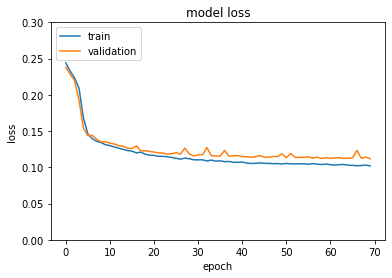

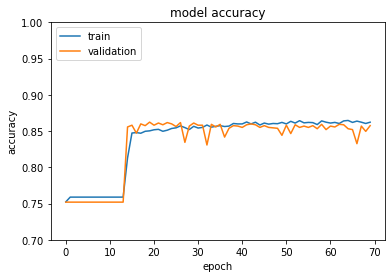

In [7]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results1_1[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results1_1[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training1_1.history["loss"])
plt.plot(training1_1.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training1_1.history["acc"])
plt.plot(training1_1.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



Como vemos, aunque presenta algún pequeño pico, el modelo es mucho más estable y sin sacrificar demasiada precisión.

Podemos probar a reducir la cantidad de entrenamientos:

In [8]:
model1_2, training1_2, results1_2 = rn([2, 10, 2, 1], 'depressed', 30)

Epoch 1/30
105/105 [==============================] - 1s 6ms/step - loss: 0.1929 - acc: 0.7404 - val_loss: 0.1839 - val_acc: 0.7520
Epoch 2/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1668 - acc: 0.7586 - val_loss: 0.1606 - val_acc: 0.7520
Epoch 3/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1516 - acc: 0.7634 - val_loss: 0.1509 - val_acc: 0.8138
Epoch 4/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1437 - acc: 0.8130 - val_loss: 0.1416 - val_acc: 0.8150
Epoch 5/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1351 - acc: 0.8264 - val_loss: 0.1317 - val_acc: 0.8435
Epoch 6/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1286 - acc: 0.8366 - val_loss: 0.1300 - val_acc: 0.8344
Epoch 7/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1247 - acc: 0.8381 - val_loss: 0.1222 - val_acc: 0.8520
Epoch 8/30
105/105 [==============================] - 0s 3ms/step - loss: 0.

| CALIDAD DEL MODELO |
 - Precisión               : 85.71%
 - Pérdida                 : 10.97%

| PROCESO DE APRENDIZAJE DEL MODELO |


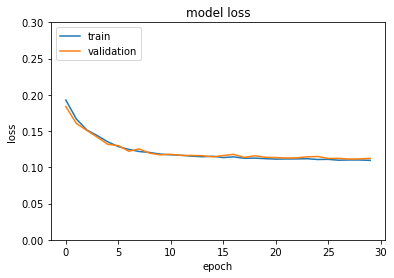

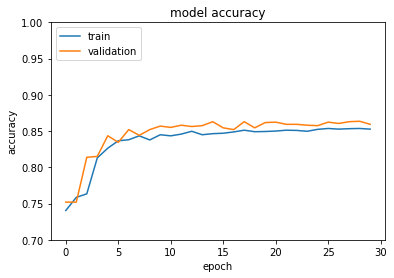

In [9]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results1_2[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results1_2[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training1_2.history["loss"])
plt.plot(training1_2.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training1_2.history["acc"])
plt.plot(training1_2.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



### Red neuronal sobre pensamientos de muerte

#### Estructura 16-8-1

In [10]:
model2, training2, results2 = rn([2, 16, 8, 1], 'dead', 70)

Epoch 1/70
105/105 [==============================] - 1s 4ms/step - loss: 0.1464 - acc: 0.8244 - val_loss: 0.0374 - val_acc: 0.9624
Epoch 2/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0317 - acc: 0.9680 - val_loss: 0.0373 - val_acc: 0.9624
Epoch 3/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0316 - acc: 0.9680 - val_loss: 0.0373 - val_acc: 0.9624
Epoch 4/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0315 - acc: 0.9680 - val_loss: 0.0372 - val_acc: 0.9624
Epoch 5/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0313 - acc: 0.9680 - val_loss: 0.0371 - val_acc: 0.9624
Epoch 6/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0310 - acc: 0.9680 - val_loss: 0.0368 - val_acc: 0.9624
Epoch 7/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0307 - acc: 0.9680 - val_loss: 0.0364 - val_acc: 0.9624
Epoch 8/70
105/105 [==============================] - 0s 3ms/step - loss: 0.

105/105 [==============================] - 0s 3ms/step - loss: 0.0177 - acc: 0.9797 - val_loss: 0.0358 - val_acc: 0.9576
Epoch 63/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0172 - acc: 0.9803 - val_loss: 0.0360 - val_acc: 0.9558
Epoch 64/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0166 - acc: 0.9821 - val_loss: 0.0348 - val_acc: 0.9582
Epoch 65/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0169 - acc: 0.9797 - val_loss: 0.0388 - val_acc: 0.9491
Epoch 66/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0177 - acc: 0.9797 - val_loss: 0.0346 - val_acc: 0.9606
Epoch 67/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0171 - acc: 0.9797 - val_loss: 0.0357 - val_acc: 0.9588
Epoch 68/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0172 - acc: 0.9806 - val_loss: 0.0358 - val_acc: 0.9539
Epoch 69/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0163

| CALIDAD DEL MODELO |
 - Precisión               : 97.3%
 - Pérdida                 : 2.3%

| PROCESO DE APRENDIZAJE DEL MODELO |


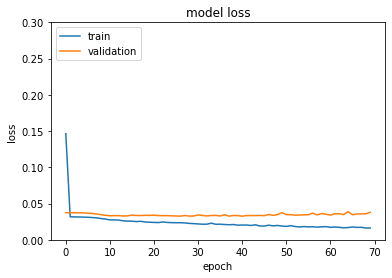

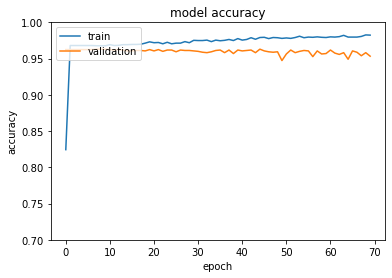

In [11]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results2[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results2[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training2.history["loss"])
plt.plot(training2.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training2.history["acc"])
plt.plot(training2.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Volvemos a observar overfitting. Probaremos con un modelo más pequeño.

#### Estructura 8-2-1

In [12]:
model2_1, training2_1, results2_1 = rn([2, 8, 2, 1], 'dead', 30)

Epoch 1/30
105/105 [==============================] - 1s 5ms/step - loss: 0.0319 - acc: 0.9680 - val_loss: 0.0369 - val_acc: 0.9618
Epoch 2/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0310 - acc: 0.9680 - val_loss: 0.0365 - val_acc: 0.9618
Epoch 3/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0295 - acc: 0.9680 - val_loss: 0.0342 - val_acc: 0.9612
Epoch 4/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0283 - acc: 0.9677 - val_loss: 0.0338 - val_acc: 0.9618
Epoch 5/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0283 - acc: 0.9677 - val_loss: 0.0324 - val_acc: 0.9618
Epoch 6/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0277 - acc: 0.9677 - val_loss: 0.0324 - val_acc: 0.9618
Epoch 7/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0266 - acc: 0.9677 - val_loss: 0.0320 - val_acc: 0.9630
Epoch 8/30
105/105 [==============================] - 0s 3ms/step - loss: 0.

| CALIDAD DEL MODELO |
 - Precisión               : 97.32%
 - Pérdida                 : 2.5%

| PROCESO DE APRENDIZAJE DEL MODELO |


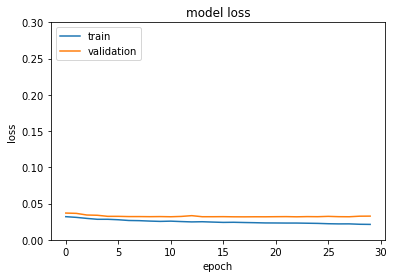

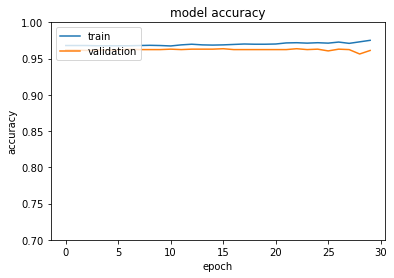

In [13]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results2_1[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results2_1[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training2_1.history["loss"])
plt.plot(training2_1.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training2_1.history["acc"])
plt.plot(training2_1.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Aunque continúa habiendo una cierta discrepancia entre los resultados de entrenamiento y los da validación, vemos que las curvas son prácticamente paralelas y este modelo nos da menos pérdida que otros modelos que ofrecen mejores resultados.

### Red neuronal sobre insomnio

#### Estructura 16-8-1

In [14]:
model3, training3, results3 = rn([2, 16, 8, 1], 'sleep', 70)

Epoch 1/70
105/105 [==============================] - 1s 8ms/step - loss: 0.2530 - acc: 0.6133 - val_loss: 0.2487 - val_acc: 0.6333
Epoch 2/70
105/105 [==============================] - 0s 3ms/step - loss: 0.2423 - acc: 0.6321 - val_loss: 0.2428 - val_acc: 0.6339
Epoch 3/70
105/105 [==============================] - 0s 4ms/step - loss: 0.2394 - acc: 0.6318 - val_loss: 0.2400 - val_acc: 0.6345
Epoch 4/70
105/105 [==============================] - 0s 3ms/step - loss: 0.2371 - acc: 0.6309 - val_loss: 0.2375 - val_acc: 0.6364
Epoch 5/70
105/105 [==============================] - 0s 3ms/step - loss: 0.2250 - acc: 0.6441 - val_loss: 0.2197 - val_acc: 0.6503
Epoch 6/70
105/105 [==============================] - 0s 4ms/step - loss: 0.2054 - acc: 0.6841 - val_loss: 0.1946 - val_acc: 0.7176
Epoch 7/70
105/105 [==============================] - 0s 4ms/step - loss: 0.1914 - acc: 0.7095 - val_loss: 0.1901 - val_acc: 0.7212
Epoch 8/70
105/105 [==============================] - 0s 3ms/step - loss: 0.

105/105 [==============================] - 0s 4ms/step - loss: 0.1599 - acc: 0.7710 - val_loss: 0.1812 - val_acc: 0.7309
Epoch 63/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1604 - acc: 0.7674 - val_loss: 0.1829 - val_acc: 0.7303
Epoch 64/70
105/105 [==============================] - 0s 4ms/step - loss: 0.1595 - acc: 0.7728 - val_loss: 0.1811 - val_acc: 0.7297
Epoch 65/70
105/105 [==============================] - 0s 4ms/step - loss: 0.1599 - acc: 0.7653 - val_loss: 0.1837 - val_acc: 0.7248
Epoch 66/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1583 - acc: 0.7749 - val_loss: 0.1808 - val_acc: 0.7255
Epoch 67/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1594 - acc: 0.7677 - val_loss: 0.1848 - val_acc: 0.7236
Epoch 68/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1580 - acc: 0.7734 - val_loss: 0.1834 - val_acc: 0.7285
Epoch 69/70
105/105 [==============================] - 1s 5ms/step - loss: 0.1578

| CALIDAD DEL MODELO |
 - Precisión               : 76.22%
 - Pérdida                 : 16.54%

| PROCESO DE APRENDIZAJE DEL MODELO |


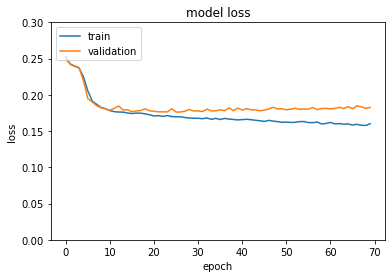

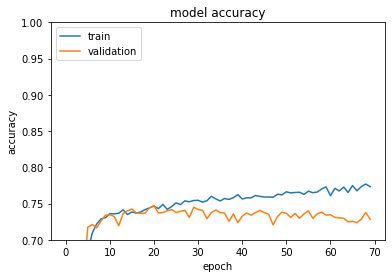

In [15]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results3[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results3[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0.0,0.3])
plt.plot(training3.history["loss"])
plt.plot(training3.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training3.history["acc"])
plt.plot(training3.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


De nuevo overfitting. Probemos con un modelo más pequeño.

#### Estructura 8-4-1

In [16]:
model3_1, training3_1, results3_1 = rn([2, 8, 4, 1], 'sleep', 30)

Epoch 1/30
105/105 [==============================] - 1s 4ms/step - loss: 0.2277 - acc: 0.6312 - val_loss: 0.2246 - val_acc: 0.6479
Epoch 2/30
105/105 [==============================] - 1s 6ms/step - loss: 0.2178 - acc: 0.6566 - val_loss: 0.2166 - val_acc: 0.6624
Epoch 3/30
105/105 [==============================] - 0s 3ms/step - loss: 0.2085 - acc: 0.6763 - val_loss: 0.2090 - val_acc: 0.6782
Epoch 4/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1986 - acc: 0.6984 - val_loss: 0.1975 - val_acc: 0.7133
Epoch 5/30
105/105 [==============================] - 0s 4ms/step - loss: 0.1925 - acc: 0.7107 - val_loss: 0.1929 - val_acc: 0.7194
Epoch 6/30
105/105 [==============================] - 0s 4ms/step - loss: 0.1884 - acc: 0.7148 - val_loss: 0.1927 - val_acc: 0.7085
Epoch 7/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1853 - acc: 0.7271 - val_loss: 0.1891 - val_acc: 0.7206
Epoch 8/30
105/105 [==============================] - 0s 3ms/step - loss: 0.

| CALIDAD DEL MODELO |
 - Precisión               : 74.29%
 - Pérdida                 : 17.25%

| PROCESO DE APRENDIZAJE DEL MODELO |


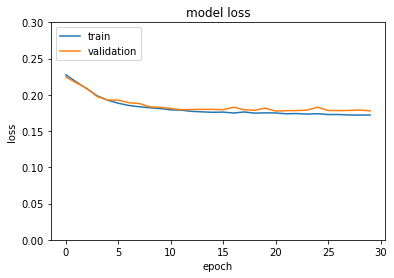

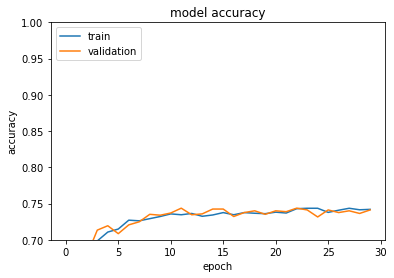

In [17]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results3_1[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results3_1[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0.0,0.3])
plt.plot(training3_1.history["loss"])
plt.plot(training3_1.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training3_1.history["acc"])
plt.plot(training3_1.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observamos que el modelo presenta más estabilidad.

### Red neuronal sobre autoestima

#### Estructura 16-8-1

In [18]:
model4, training4, results4 = rn([2, 16, 8, 1], 'yourself', 70)

Epoch 1/70
105/105 [==============================] - 1s 5ms/step - loss: 0.2287 - acc: 0.6915 - val_loss: 0.1496 - val_acc: 0.8206
Epoch 2/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1388 - acc: 0.8289 - val_loss: 0.1363 - val_acc: 0.8206
Epoch 3/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1262 - acc: 0.8289 - val_loss: 0.1239 - val_acc: 0.8206
Epoch 4/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1155 - acc: 0.8292 - val_loss: 0.1159 - val_acc: 0.8212
Epoch 5/70
105/105 [==============================] - 0s 4ms/step - loss: 0.1092 - acc: 0.8297 - val_loss: 0.1084 - val_acc: 0.8206
Epoch 6/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1045 - acc: 0.8289 - val_loss: 0.1063 - val_acc: 0.8212
Epoch 7/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1034 - acc: 0.8635 - val_loss: 0.1076 - val_acc: 0.8679
Epoch 8/70
105/105 [==============================] - 0s 3ms/step - loss: 0.

105/105 [==============================] - 0s 4ms/step - loss: 0.0818 - acc: 0.8949 - val_loss: 0.1006 - val_acc: 0.8648
Epoch 63/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0804 - acc: 0.8978 - val_loss: 0.1011 - val_acc: 0.8655
Epoch 64/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0796 - acc: 0.8970 - val_loss: 0.1016 - val_acc: 0.8618
Epoch 65/70
105/105 [==============================] - 0s 4ms/step - loss: 0.0798 - acc: 0.8993 - val_loss: 0.1005 - val_acc: 0.8655
Epoch 66/70
105/105 [==============================] - 0s 4ms/step - loss: 0.0803 - acc: 0.8978 - val_loss: 0.0993 - val_acc: 0.8703
Epoch 67/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0807 - acc: 0.8961 - val_loss: 0.1026 - val_acc: 0.8624
Epoch 68/70
105/105 [==============================] - 0s 4ms/step - loss: 0.0783 - acc: 0.8973 - val_loss: 0.1008 - val_acc: 0.8618
Epoch 69/70
105/105 [==============================] - 1s 5ms/step - loss: 0.0787

| CALIDAD DEL MODELO |
 - Precisión               : 89.04%
 - Pérdida                 : 8.46%

| PROCESO DE APRENDIZAJE DEL MODELO |


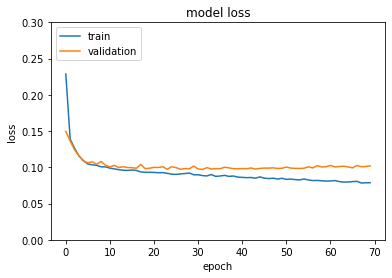

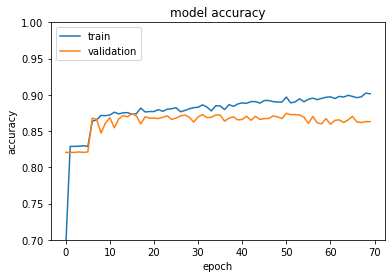

In [19]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results4[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results4[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training4.history["loss"])
plt.plot(training4.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training4.history["acc"])
plt.plot(training4.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


De nuevo vemos el overfitting representado por la linea de validación alejándose de la de entrenamiento.

Redimensionamos en modelo.

#### Estructura 8-4-1

In [20]:
model4_1, training4_1, results4_1 = rn([2, 8, 4, 1], 'yourself', 30)

Epoch 1/30
105/105 [==============================] - 2s 7ms/step - loss: 0.1476 - acc: 0.8283 - val_loss: 0.1495 - val_acc: 0.8206
Epoch 2/30
105/105 [==============================] - 0s 4ms/step - loss: 0.1419 - acc: 0.8289 - val_loss: 0.1460 - val_acc: 0.8206
Epoch 3/30
105/105 [==============================] - 0s 5ms/step - loss: 0.1374 - acc: 0.8289 - val_loss: 0.1409 - val_acc: 0.8206
Epoch 4/30
105/105 [==============================] - 1s 5ms/step - loss: 0.1294 - acc: 0.8289 - val_loss: 0.1292 - val_acc: 0.8206
Epoch 5/30
105/105 [==============================] - 1s 5ms/step - loss: 0.1189 - acc: 0.8289 - val_loss: 0.1205 - val_acc: 0.8206
Epoch 6/30
105/105 [==============================] - 0s 4ms/step - loss: 0.1122 - acc: 0.8351 - val_loss: 0.1159 - val_acc: 0.8424
Epoch 7/30
105/105 [==============================] - 0s 5ms/step - loss: 0.1085 - acc: 0.8605 - val_loss: 0.1124 - val_acc: 0.8430
Epoch 8/30
105/105 [==============================] - 0s 4ms/step - loss: 0.

| CALIDAD DEL MODELO |
 - Precisión               : 87.52%
 - Pérdida                 : 9.37%

| PROCESO DE APRENDIZAJE DEL MODELO |


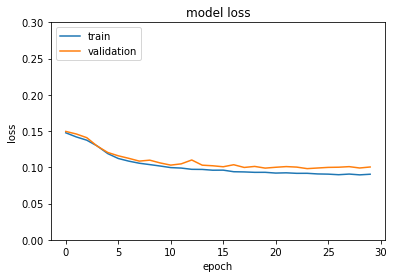

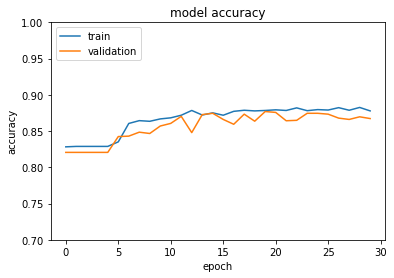

In [21]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results4_1[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results4_1[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training4_1.history["loss"])
plt.plot(training4_1.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training4_1.history["acc"])
plt.plot(training4_1.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Red neuronal sobre visita en salud mental

#### Estructura 16-8-1

In [22]:
model5, training5, results5 = rn([2, 16, 8, 1], 'profMental', 70)

Epoch 1/70
105/105 [==============================] - 2s 7ms/step - loss: 0.0818 - acc: 0.9151 - val_loss: 0.0756 - val_acc: 0.9176
Epoch 2/70
105/105 [==============================] - 0s 4ms/step - loss: 0.0764 - acc: 0.9151 - val_loss: 0.0731 - val_acc: 0.9170
Epoch 3/70
105/105 [==============================] - 0s 4ms/step - loss: 0.0730 - acc: 0.9151 - val_loss: 0.0721 - val_acc: 0.9152
Epoch 4/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0713 - acc: 0.9157 - val_loss: 0.0719 - val_acc: 0.9164
Epoch 5/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0704 - acc: 0.9166 - val_loss: 0.0709 - val_acc: 0.9170
Epoch 6/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0699 - acc: 0.9172 - val_loss: 0.0695 - val_acc: 0.9158
Epoch 7/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0682 - acc: 0.9172 - val_loss: 0.0690 - val_acc: 0.9158
Epoch 8/70
105/105 [==============================] - 0s 4ms/step - loss: 0.

105/105 [==============================] - 1s 5ms/step - loss: 0.0571 - acc: 0.9343 - val_loss: 0.0736 - val_acc: 0.9103
Epoch 63/70
105/105 [==============================] - 0s 5ms/step - loss: 0.0564 - acc: 0.9346 - val_loss: 0.0733 - val_acc: 0.9115
Epoch 64/70
105/105 [==============================] - 1s 5ms/step - loss: 0.0559 - acc: 0.9355 - val_loss: 0.0738 - val_acc: 0.9109
Epoch 65/70
105/105 [==============================] - 1s 5ms/step - loss: 0.0559 - acc: 0.9376 - val_loss: 0.0748 - val_acc: 0.9109
Epoch 66/70
105/105 [==============================] - 1s 5ms/step - loss: 0.0553 - acc: 0.9388 - val_loss: 0.0738 - val_acc: 0.9121
Epoch 67/70
105/105 [==============================] - 0s 5ms/step - loss: 0.0559 - acc: 0.9364 - val_loss: 0.0742 - val_acc: 0.9115
Epoch 68/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0557 - acc: 0.9367 - val_loss: 0.0749 - val_acc: 0.9109
Epoch 69/70
105/105 [==============================] - 0s 5ms/step - loss: 0.0549

| CALIDAD DEL MODELO |
 - Precisión               : 92.88%
 - Pérdida                 : 6.08%

| PROCESO DE APRENDIZAJE DEL MODELO |


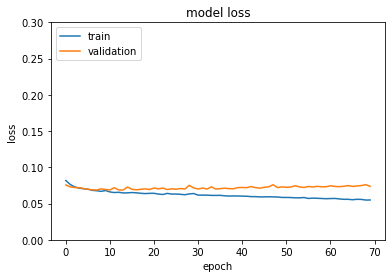

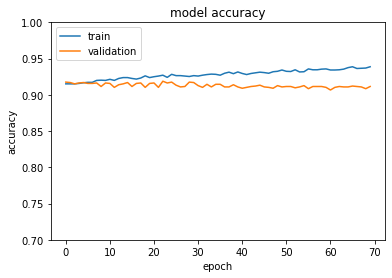

In [23]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results5[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results5[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training5.history["loss"])
plt.plot(training5.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training5.history["acc"])
plt.plot(training5.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Redimensionamos.

#### Estructura 8-4-1

In [24]:
model5_1, training5_1, results5_1 = rn([2, 8, 4, 1], 'profMental', 30)

Epoch 1/30
105/105 [==============================] - 1s 6ms/step - loss: 0.1602 - acc: 0.8183 - val_loss: 0.0821 - val_acc: 0.9176
Epoch 2/30
105/105 [==============================] - 0s 3ms/step - loss: 0.0843 - acc: 0.9151 - val_loss: 0.0819 - val_acc: 0.9176
Epoch 3/30
105/105 [==============================] - 0s 4ms/step - loss: 0.0841 - acc: 0.9154 - val_loss: 0.0816 - val_acc: 0.9176
Epoch 4/30
105/105 [==============================] - 1s 6ms/step - loss: 0.0837 - acc: 0.9157 - val_loss: 0.0814 - val_acc: 0.9176
Epoch 5/30
105/105 [==============================] - 1s 6ms/step - loss: 0.0832 - acc: 0.9154 - val_loss: 0.0810 - val_acc: 0.9176
Epoch 6/30
105/105 [==============================] - 1s 5ms/step - loss: 0.0826 - acc: 0.9157 - val_loss: 0.0807 - val_acc: 0.9176
Epoch 7/30
105/105 [==============================] - 0s 4ms/step - loss: 0.0818 - acc: 0.9157 - val_loss: 0.0812 - val_acc: 0.9133
Epoch 8/30
105/105 [==============================] - 0s 3ms/step - loss: 0.

| CALIDAD DEL MODELO |
 - Precisión               : 92.18%
 - Pérdida                 : 6.66%

| PROCESO DE APRENDIZAJE DEL MODELO |


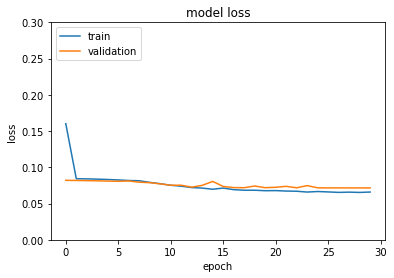

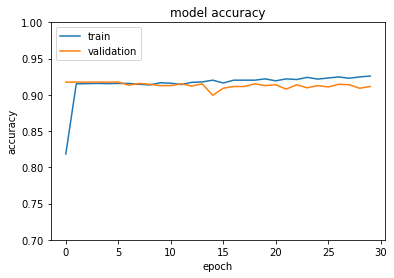

In [25]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results5_1[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results5_1[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training5_1.history["loss"])
plt.plot(training5_1.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training5_1.history["acc"])
plt.plot(training5_1.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Pruebas de predicción del modelo de Deep Learning

### Depresión

In [26]:
# probamos con aquellos valores que no se habían clasificado
prob=df[df.depressed>1]
prob=prob.drop(['depressed'], axis=1).values

# entrenamos el modelo con mejores resultados
new=model1_2.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [ 0.  49.   6.   0.   2.   1.   4.   2.   0.   0.   3.4  0.   1.   0.
  2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.
  0.   0.   0.   1.   1.   3.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  1.   0.   1.   0.   0.   0.   3.   9.   9.   9.   9.   5. ]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [ 1.   63.    6.    0.    2.    1.    4.    1.    0.    2.    2.73  1.
  0.    0.    2.    0.    0.    1.    1.    0.    1.    1.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    4.    2.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    1.    1.    1.    0.    0.    0.
  0.    0.    2.    9.    9.    9.    9.    1.  ]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [ 1.   80.    1.    0.    2.    2.    4.    0.    1.    1. 

### Pensamientos de muerte

In [27]:
# probamos con aquellos valores que no se habían clasificado
prob=df[df.dead>1]
prob=prob.drop(['dead'], axis=1).values

# entrenamos el modelo con mejores resultados
new=model2_1.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [ 1.   61.    3.    0.    1.    2.    4.    1.    1.    1.    1.23  1.
  1.    1.    3.    1.    0.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    0.    0.    0.    0.    0.    1.    5.    2.    0.    0.
  0.    0.    0.    0.    0.    0.    1.    0.    1.    0.    0.    1.
  1.    0.    0.    1.    0.    1.    0.    0.    0.    5.    5.    0.
  0.    1.    3.    9.    9.    9.    9.    2.  ]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [ 0.   54.    1.    0.    1.    3.    3.    0.    0.    2.    0.77  1.
  0.    0.    3.    0.    0.    0.    0.    0.    0.    1.    1.    1.
  1.    0.    1.    0.    1.    0.    0.    0.    4.    3.    0.    0.
  0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    1.    1.    0.    3.    1.    0.
  0.    1.    2.    1.    1.    9.    9.    3.  ]
 - Clasificación        : [0.]



### Insomnio

In [28]:
# probamos con aquellos valores que no se habían clasificado
prob=df[df.sleep>1]
prob=prob.drop(['sleep'], axis=1).values

# entrenamos el modelo con mejores resultados
new=model3_1.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [ 1.   74.    2.    0.    1.    1.    3.    0.    0.    2.    0.77  1.
  0.    0.    3.    0.    1.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    1.    3.    3.    0.    0.
  0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.
  1.    0.    0.    0.    0.    1.    1.    1.    0.    5.    0.    0.
  0.    1.    2.    9.    9.    9.    9.    3.  ]
 - Clasificación        : [0.]



### Autoestima

In [29]:
# probamos con aquellos valores que no se habían clasificado
prob=df[df.yourself>1]
prob=prob.drop(['yourself'], axis=1).values

# entrenamos el modelo con mejores resultados
new=model4_1.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [ 1. 80.  3.  0.  1.  1.  2.  0.  0.  2.  5.  1.  1.  0.  3.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4.  3.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  2.  1.  0.  0.  0.  3.  1.  9.  9.  9.  4.]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [ 1.   80.    1.    0.    2.    2.    4.    0.    1.    1.    2.76  0.
  0.    0.    3.    0.    0.    1.    1.    1.    1.    0.    9.    0.
  1.    0.    0.    0.    1.    0.    0.    1.    2.    3.    0.    0.
  0.    0.    1.    0.    1.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    4.    0.    0.
  0.    0.    2.    9.    9.    9.    9.    2.  ]
 - Clasificación        : [1.]



### Visita a salud mental

In [30]:
# probamos con aquellos valores que no se habían clasificado
prob=df[df.profMental>1]
prob=prob.drop(['profMental'], axis=1).values

# entrenamos el modelo con mejores resultados
new=model5_1.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [ 1.   68.    6.    0.    2.    1.    5.    1.    0.    2.    0.86  0.
  9.    1.    3.    1.    0.    0.    1.    0.    1.    0.    0.    1.
  1.    0.    0.    0.    0.    0.    0.    0.    1.    5.    1.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.
  0.    0.    3.    9.    9.    9.    9.    1.  ]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [ 0.   47.    3.    0.    2.    3.    1.    0.    0.    0.    3.26  1.
  1.    0.    3.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  1.    1.    1.    0.    0.    0.    0.    0.    1.    3.    2.    0.
  0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    1.    0.    0.    0.    1.    1.    1.    3.    1.    0.
  1.    1.    2.    9.    1.    9.    9.    3.  ]
 - Clasificación        : [0.]

 - Datos sin clasificar      